### 實驗內容描述:
手刻一個Perceptron並測試效果
###實驗結果:
單層的Perceptron的對於能線性分割的資料集都能得到很好的效果，但多層的Perceptron才能處理非線性的問題

###結果討論與實驗心得:
自己手寫一個Perceptron很有趣，更了解神經網路的運作方式

## 練習基本的Perceptron

### 實驗前的準備


**Import packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### 準備Datasets

**生成資料**

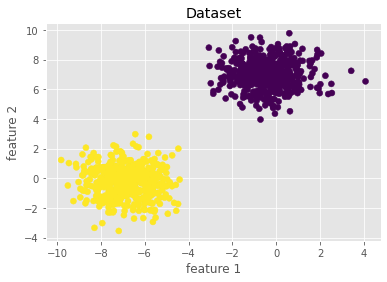

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2) #n_samples 點的個數(平均分配) centers 類別個數 

#用圖呈現資料分布
plt.scatter(X[:,0], X[:,1], c=y) #X[:,0] = 第一行的所有數字(X軸) X[:,1] = 第二行的所有數字(Y軸) c = y 以類別顯示顏色 
plt.title("Dataset")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

**將 datasets 拆分成 training 和 testing**

In [ ]:
from sklearn.model_selection import train_test_split

y = y[:, np.newaxis] #將y增加一維(1d => 2d)，以方便訓練 (也可以用np.expand_dims(y, axis =1))
X_train, X_test, y_train, y_test = train_test_split(X, y) #預設比例 3:1

### 定義感知器

In [ ]:
class Perceptron():
    def __init__(self):
        pass
    
    def step_function(self, X): #Heaviside function
        return np.array([1 if i > 0 else 0 for i in X])[:, np.newaxis]

    def train(self, X, y, learning_rate=0.05, n_iters=100): #預設learning rate為0.05 更新參數的次數為100
        n_features = X.shape[1] #X.shape = (data個數, data的feature個數)

        # Step 0: 初始化參數 (weight, bias)
        self.weights = np.zeros((n_features, 1)) # 𝑤 =(𝑤(1),...,𝑤(𝑑))
        self.bias = 0

        for i in range(n_iters):
            # Step 1: 計算X和weight的內積，並加上bias (𝑎 = 𝑋 ⋅ 𝑤 + 𝑏)
            a = np.dot(X, self.weights) + self.bias

            #Step 2: 通過Activation Function得到ŷ (y的預測值) 
            y_predict = self.step_function(a)

            #Step 3: 根據learning rate計算參數更新的差
            '''
            當y_predict - y越大, delta_w, delta_b也會越大，weights, bias調整越多
            當y_predict - y越小, delta_w, delta_b也會越小，weights, bias調整越少
            '''
            delta_w = learning_rate * np.dot(X.T, (y_predict - y)) # Δ𝑤 = 𝜂 * 𝑋𝑇 ⋅ (𝑦̂ − 𝑦)
            delta_b = learning_rate * np.sum(y_predict - y) # Δ𝑏 = 𝜂 * (𝑦̂ − 𝑦)

            #Step 4: 更新參數
            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias
    
    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)


### 訓練並測試

In [ ]:
#Initialize model
model = Perceptron()

#Training
weights, bias = model.train(X_train, y_train, learning_rate=0.05, n_iters=500)

#訓練成果
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print(f"Training accuracy: {np.mean(np.abs(y_train_predict - y_train)) * 100}%")
print(f"Testing accuracy: { np.mean(np.abs(y_test_predict - y_test)) * 100}%")

Training accuracy: 100.0%
Testing accuracy: 100.0%


### 呈現Hyperplane

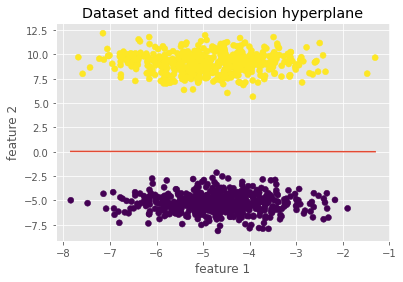

In [ ]:
def plot_hyperplane(X, y, weights, bias):
    slope = - weights[0]/weights[1] #計算斜率
    intercept = - bias/weights[1] #計算截距
    x_hyperplane = np.linspace(np.min(X[:,0]), np.max(X[:,0]),10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.scatter(X[:,0], X[:,1], c=y) 
    plt.plot(x_hyperplane, y_hyperplane, '-') #畫分割線
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.show()

plot_hyperplane(X, y, weights, bias)

## 建立能處理XOR問題的Mult-Layer Perceptron

#### 定義Perceptron (Layer)

In [18]:
class Perceptron():
    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
        self.caches = {"Z": 0, 'A': 0}
       
    def build(self, input_shape):
        self.weights = np.random.randn(input_shape, self.n_neurons)
        self.bias = np.zeros(self.n_neurons)#np.zeros(self.n_neurons)
        return self.n_neurons;

    def out(self, X):
        z = np.dot(X, self.weights) + self.bias # (z = 𝑋 ⋅ 𝑤 + 𝑏)
        a = self.sigmoid(z) # 通過Activation Function
        self.caches['Z'] = z
        self.caches['A'] = a
        return a
    
    def update_parameters(self, lr, dw, db):
        self.weights -= lr * dw
        self.bias -= lr * db

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    def get_weights(self):
        return self.weights
    
    def get_caches(self):
        return self.caches

#### 定義model

In [19]:
class MLP():
    def __init__(self, layers, learning_rate=0.1 ,epochs=100):
        self.layers = layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.dz = [None] * len(self.layers)
        self.dw = [None] * len(self.layers)
        self.db = [None] * len(self.layers)
        self.losses = np.zeros((epochs, 1))

    def sigmoid_der(self, x):
        return x * (1 - x)

    def forward_prop(self, X):
        for layer in self.layers:
            X = layer.out(X)
        return X

    def back_prop(self, X, error):
        m = X.shape[0] # total number of datas
        n = len(self.layers)-1
        
        for i in reversed(range(len(self.layers))):
            if i == n:
                self.dz[i] = error
                self.dw[i] = np.dot(self.layers[i-1].get_caches()['A'].T, self.dz[i]) / m
                self.db[i] = np.sum(self.dz[i]) 
            elif i == 0:
                self.dz[i] =  np.dot(self.dz[i+1], self.layers[i+1].get_weights().T) * self.sigmoid_der(self.layers[i].get_caches()['A'])
                self.dw[i] = np.dot(X.T, self.dz[i]) / m
                self.db[i] = np.sum(self.dz[i]) / m
            else:
                self.dz[i] =  np.dot(self.dz[i+1], self.layers[i+1].get_weights().T) * self.sigmoid_der(self.layers[i].get_caches()['A'])
                self.dw[i] = np.dot(self.layers[i-1].get_caches()['A'].T, self.dz[i]) / m
                self.db[i] = np.sum(self.dz[i]) / m

            
    
    def update_parameters(self):
        for i, layer in enumerate(self.layers):
            layer.update_parameters(self.learning_rate, self.dw[i], self.db[i])

    def build(self, X):
        shape = X.shape[1]
        for layer in self.layers:
            shape = layer.build(shape)

    def fit(self, X, y):
        #Initialize layers
        self.build(X)

        #Start Training
        for i in range(self.epochs):
            # Step 1: 得到ŷ (y的預測值) 
            y_predict = self.forward_prop(X)

            #Step 2: 計算loss (Log Loss)
            loss = -np.sum(np.multiply(np.log(y_predict), y) + np.multiply(np.log(1 - y_predict), (1 - y_predict))) / X.shape[0]
            self.losses[i, 0] = loss

            #Step 3: Back Propagation
            error = y_predict - y
            self.back_prop(X, error)

            #Step 4: 更新 Parameters
            self.update_parameters()

    def predict(self, X):
        return self.forward_prop(X)

    def getLosses(self):
        return self.losses


#### 訓練並測試model

In [22]:
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = MLP([
    Perceptron(2), #hidden layer
    Perceptron(1), #output layer
],epochs=100000)

model.fit(X, y)

np.set_printoptions(suppress=True) #把科學符號轉成float
y = model.predict(X)
print(y)

[[0.00087027]
 [0.99904515]
 [0.99904511]
 [0.0011448 ]]


#### 評估model

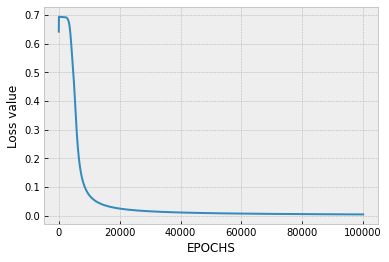

In [23]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

#印出每個epoch所對應的loss
plt.plot(model.getLosses())
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()